택시 운행기록을 보고 예측 문제 정의, 해결, 발전시키기

# 9.1 Loading Data

In [1]:
import numpy as np
import operator

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

N = 8e6 #8^6개만큼의 데이터만 사용하겠다
data = pd.read_csv('drive/MyDrive/trip_data_1.csv', nrows=N)

data[:5] #처음 5행

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [5]:
fare_data = pd.read_csv('drive/MyDrive/trip_fare_1.csv', nrows=N)
fare_cols = [u' payment_type', u' fare_amount', u' surcharge', u' mta_tax', u' tip_amount',
             u' tolls_amount', u' total_amount']
data = data.join(fare_data[fare_cols]) #csv 두개 같은 id 가진 애들끼리 합침
del fare_data
data[:10]
print(data.shape)
data.loc[:5, data.columns[:5]]

(49999, 21)


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N
5,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N


# 9.2 Data Visualization

<h3> 9.2.1 이동 소요 시간 (trip_time_in_secs)와 이용 총 요금(total_amount)간의 관계

Populating the interactive namespace from numpy and matplotlib


(0.0, 300.0)

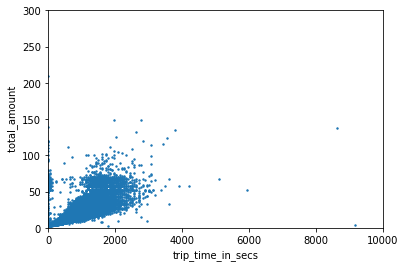

In [6]:
%pylab inline

data.plot(x="trip_time_in_secs", y=" total_amount", kind="scatter", s=2)
xlim(0, 1e4)
ylim(0,300)

In [7]:
# outlier 제거
ind = where(logical_and(data.trip_time_in_secs < 500, data[' total_amount'] > 30))[0]
data = data.drop(ind)
data.shape

(49833, 21)

<h3> 9.2.2 Pairplot

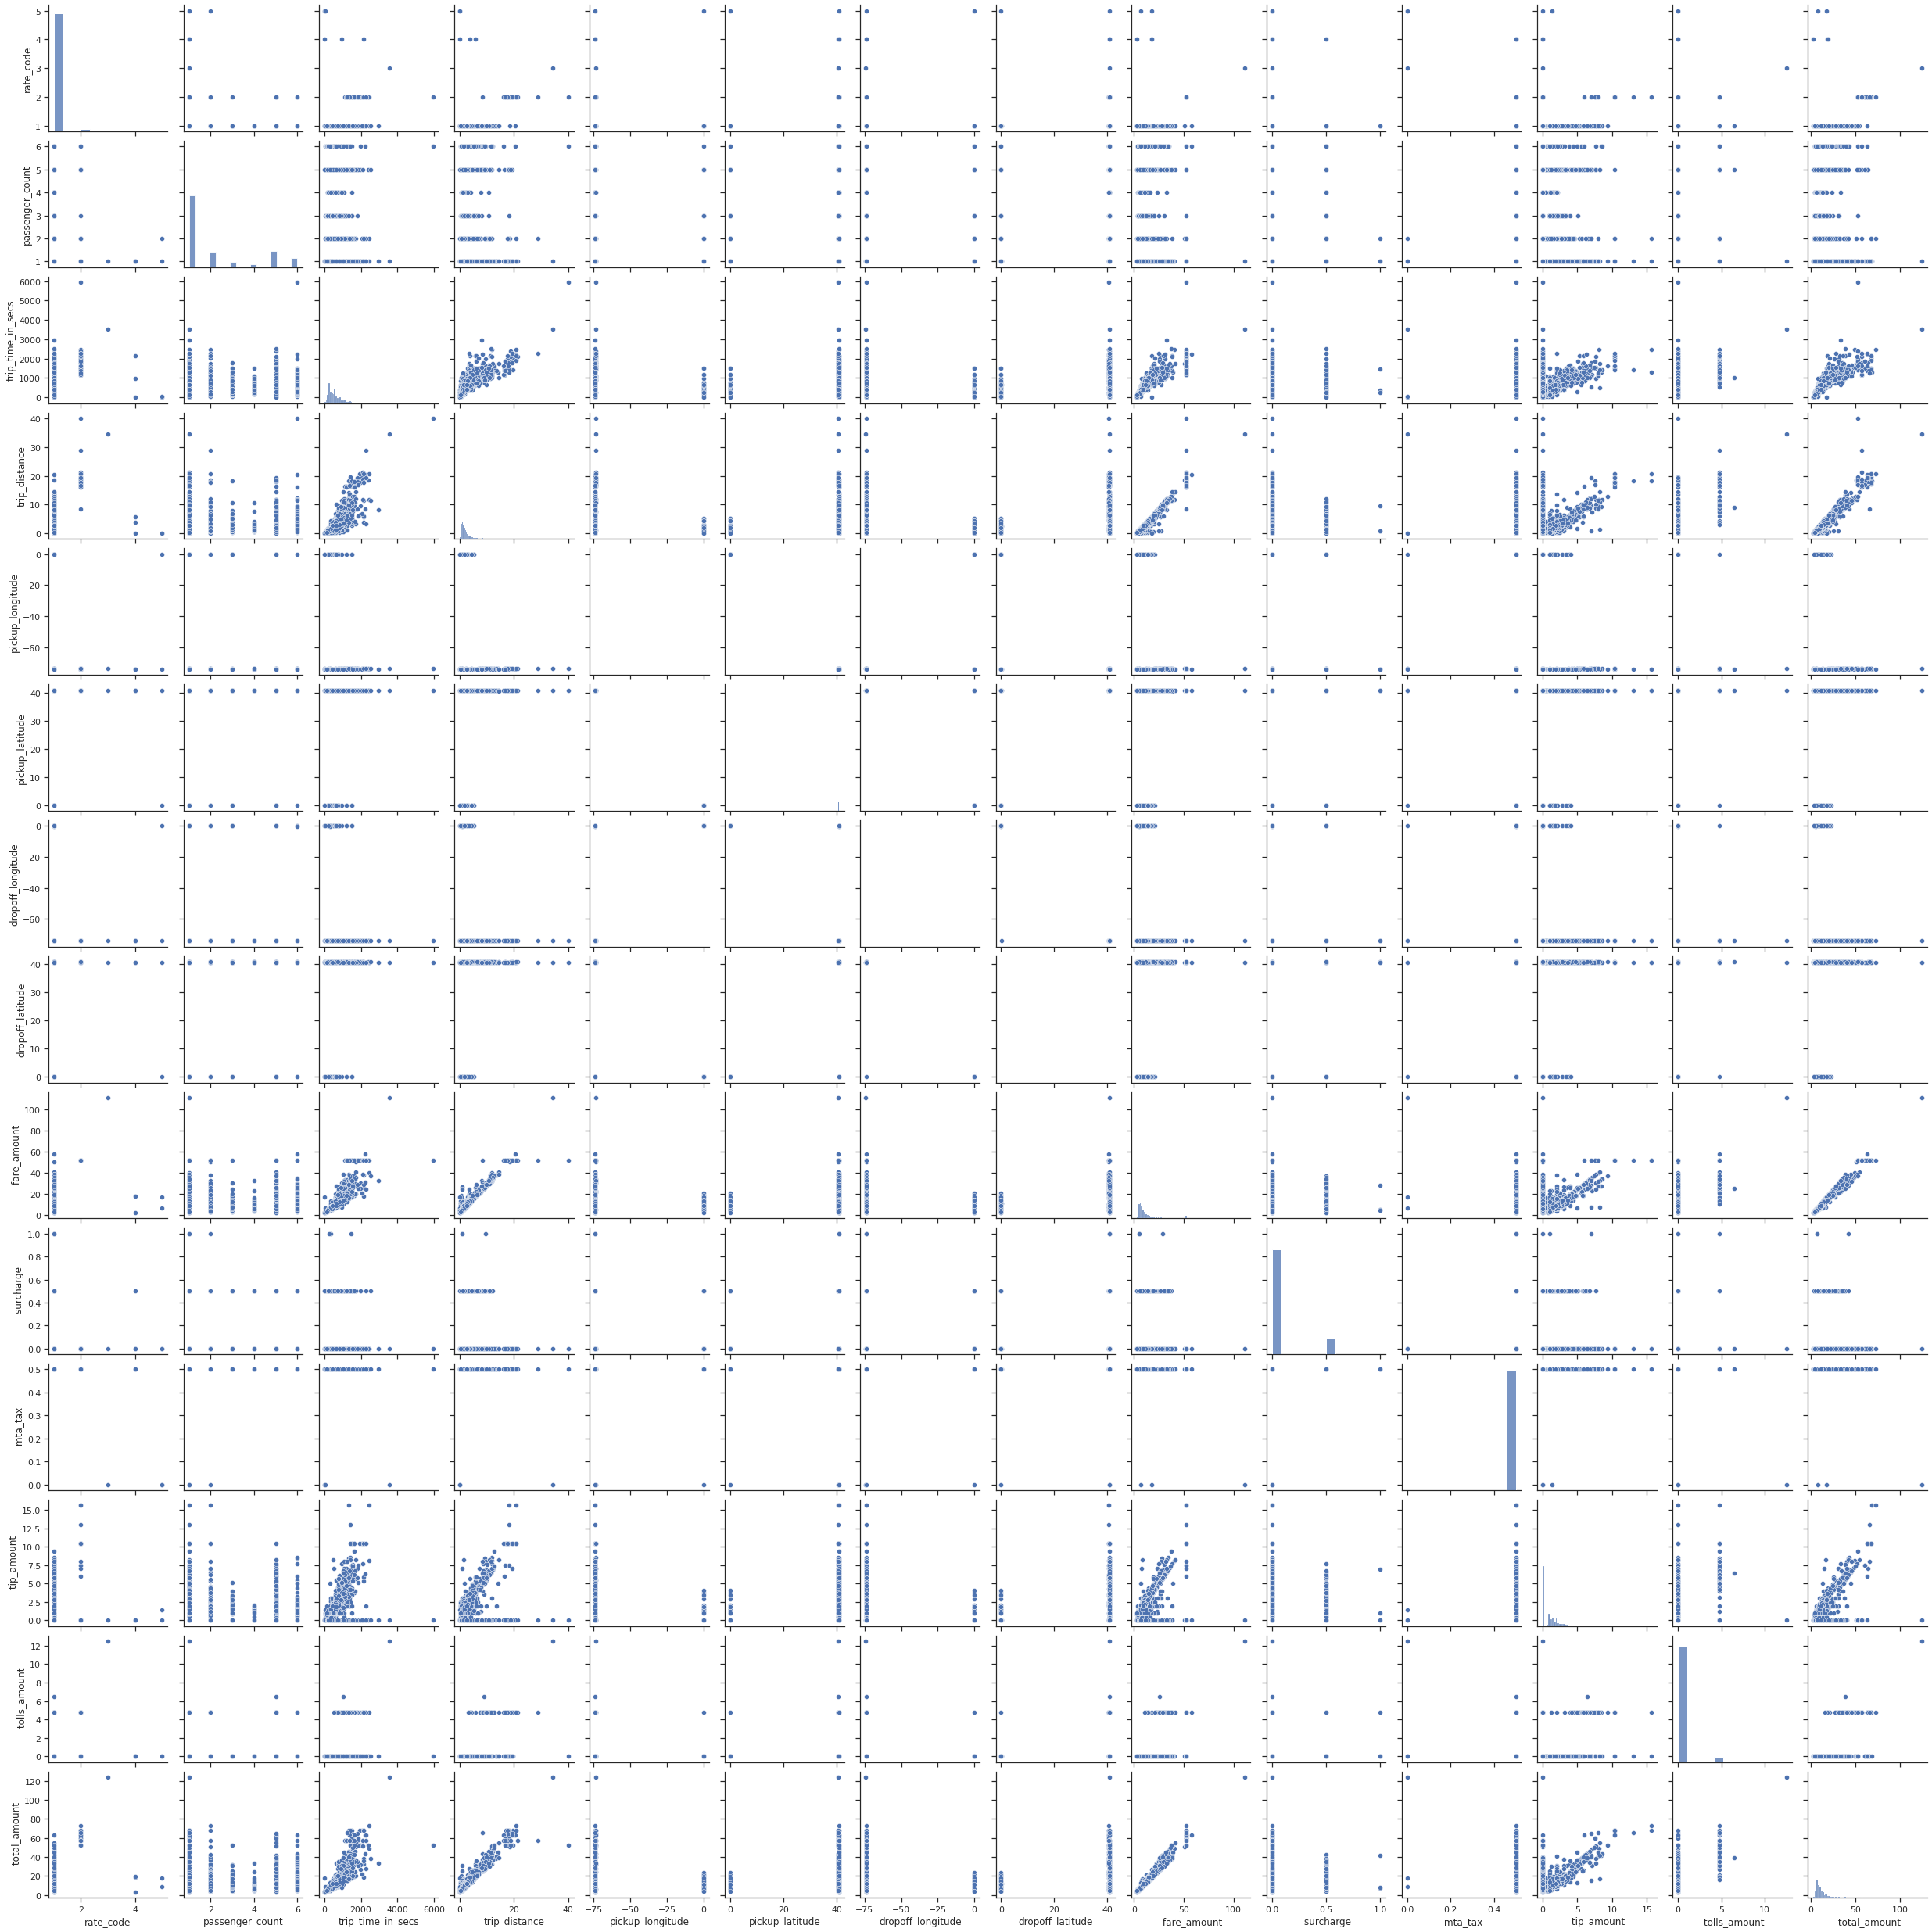

In [13]:
# 40%의 데이터 모든 변수들 간 scatterplot 그려보기

import seaborn as sns #seaborn이라는 라이브러리 이용
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data.sample(2000))

<h3> 9.2.3 Histogram Analysis

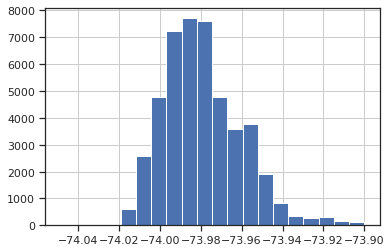

In [17]:
# 하차 지역의 위도/경도

data[logical_and(data.dropoff_latitude > 40.6, data.dropoff_latitude < 40.9)].dropoff_latitude.hist(bins=20) #위도
data[logical_and(data.dropoff_longitude > -74.05, data.dropoff_longitude < -73.9)].dropoff_longitude.hist(bins=20) #경도

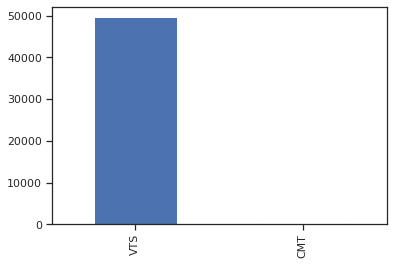

In [20]:
# 택시 회사별 분포

data.vendor_id.value_counts().plot(kind="bar")

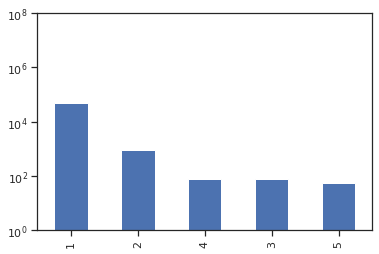

In [21]:
# 요금 rate

data.rate_code.value_counts().plot(kind="bar", logy=True, ylim=(1,1e8))

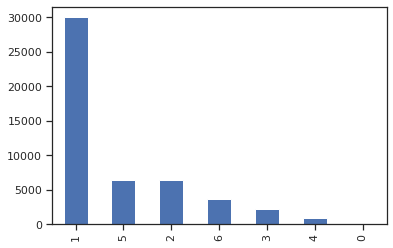

In [22]:
# 동시 탑승 승객의 수

data.passenger_count.value_counts().plot(kind="bar")

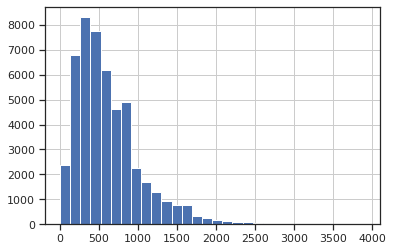

In [25]:
# 이동에 소요된 시간

data.trip_time_in_secs[data.trip_time_in_secs < 4000].hist(bins=30)

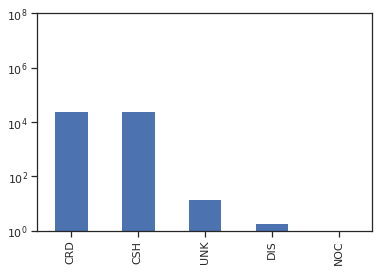

In [26]:
# 지불 방법의 분포

data[' payment_type'].value_counts().plot(kind="bar", logy=True, ylim=(1, 1e8))

<h3> 9.2.4 Scatterplot Analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 40.0)

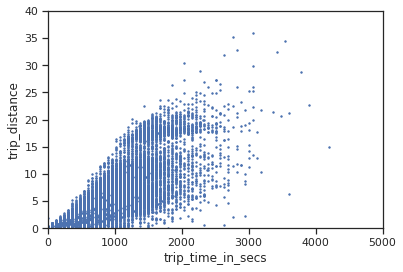

In [27]:
# 이동 거리 - 이동 시간

data.plot(x="trip_time_in_secs", y="trip_distance", kind="scatter", s=2)
xlim(0,5000)
ylim(0,40)

(-74.05, -73.9)

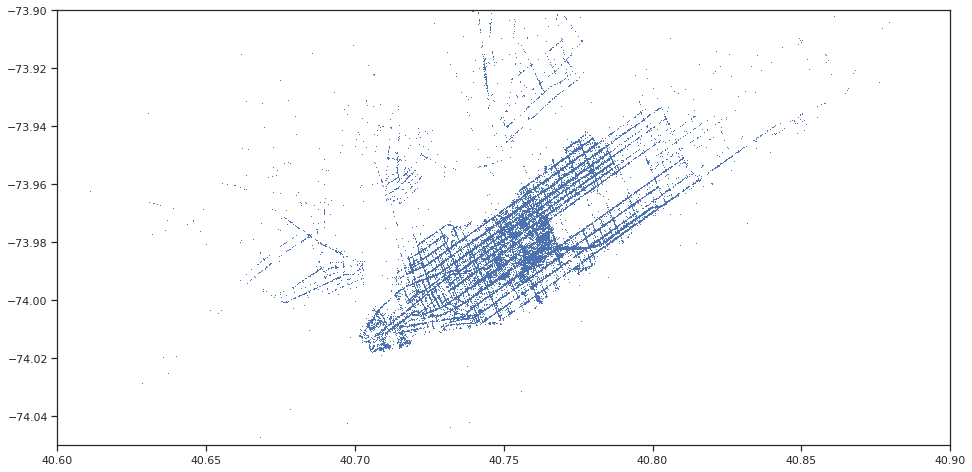

In [28]:
# 탑승 지점 좌표 -> 거리의 형태 파악 가능

figure(figsize=(16,8))
plot(data["pickup_latitude"], data["pickup_longitude"], 'b, ')
xlim(40.6, 40.9)
ylim(-74.05, -73.9)

# 9.3 Data-dricen Problem Solving

<h3> Q. 택시 탑승/운행 기록으로부터 탑승객이 기사님에게 팁을 지불할지 아닐지 예측해보자

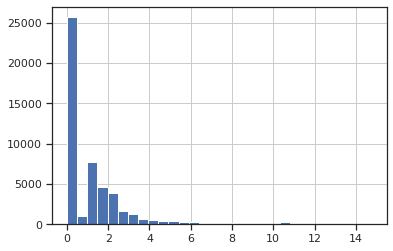

In [29]:
# 팁을 준다/안준다 binary로 예측

data[data[' tip_amount'] < 15][' tip_amount'].hist(bins=30)

In [30]:
# 신용카드를 사용하여 거랠르 한 탑승객의 정보만을 사용

len(data)
data_subset = data[data[' payment_type'] != "CSH"]
data_subset.reset_index(inplace=True, drop=True)
len(data_subset)

25143

<h3> 9.3.1 Constructing preductuve Models

In [31]:
# tipped라는 이름의 class label 만들기
 
data_subset['tipped'] = (data_subset[' tip_amount'] > 0).astype("int") #팁 줬으면 1
data_subset['tipped'].value_counts() #안줬으면 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    24179
0      964
Name: tipped, dtype: int64

In [37]:
# 예측에 사용될 attribute 선택하고, train_Test 데이터셋 구성

feats1 = [u'rate_code', 'passenger_count', u'trip_time_in_secs', u'trip_distance',
          u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude',
          ' fare_amount', u' surcharge', u' mta_tax', ' tolls_amount']

M = len(data_subset)
rand_idx = arange(M)
random.shuffle(rand_idx)
train_idx = rand_idx[int(M*0.2):]
test_idx = rand_idx[:int(M*0.2)]

from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
normalizer.fit(data_subset.loc[train_idx, feats1])
data_subset_scaled = normalizer.transform(data_subset[feats1])

<h2> 방법1) Logistic Regression

In [38]:
# 먼저 logistic regression 사용하여 데이터를 학습하고, tip을 받게 될지 아닐지 여부를 예측. 학습 이후 accuracy와 auroc 방법으로 모델 성능 평가

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



<h3> 9.3.2 Improving the Model Preperformance by Adding Features

# 새 섹션